# PD7

### Zuzanna Mróz

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.decomposition import PCA

In [2]:
img = mpimg.imread("pic.png")

Zbadamy wpływ kompresji na niżej pokazany obrazek.

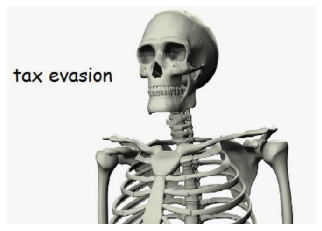

In [3]:
plt.axis('off') 
plt.imshow(img) 

In [4]:
def compression(img, n_comps):
    img1 = np.reshape(img, (img.shape[0], img.shape[1]*img.shape[2]))
    
    pca = PCA(n_comps).fit(img1)
    img_pca = pca.transform(img1)
    
    img2 = pca.inverse_transform(img_pca) 
    img_comp = np.reshape(img2, (img.shape[0], img.shape[1], img.shape[2]))
    
    return img_comp, pca, img_pca

In [5]:
def size_comparison(img, pca, img_pca):
    
    org_size = img.shape[0] * img.shape[1] * img.shape[2]
    comp_size = img_pca.shape[0] * img_pca.shape[1] + pca.components_.shape[0] * pca.components_.shape[1]
    
    print("Size before compression: ")
    print(org_size)
    print("Size after compression: ")
    print(comp_size)
    print("Compression ratio: ")
    print("{:.2f}%".format((comp_size / org_size)*100))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Size before compression: 
1236616
Size after compression: 
3115
Compression ratio: 
0.25%


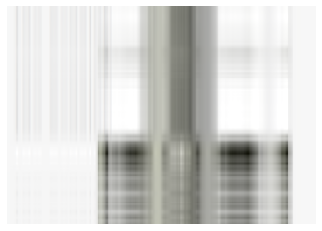

In [6]:
img_comp, pca, img_pca = compression(img, 1)
plt.axis(False)
plt.imshow(img_comp)
size_comparison(img, pca, img_pca)

Jak widać obrazek znacznie zmniejszył rozmiar ale też niestety przy takiej kompresji nie da się z niego praktycznie nic odczytać

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Size before compression: 
1236616
Size after compression: 
24920
Compression ratio: 
2.02%


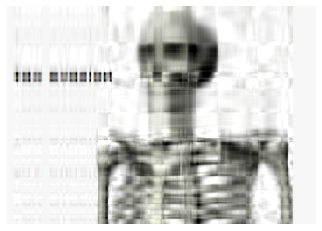

In [7]:
img_comp, pca, img_pca = compression(img, 8)
plt.axis(False)
plt.imshow(img_comp)
size_comparison(img, pca, img_pca)

Tutaj już rozmiar nadal jest stosunkowo bardzo zmniejszony. Szkielet jest już całkiem widoczny ale tekst nadal słabo.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Size before compression: 
1236616
Size after compression: 
49840
Compression ratio: 
4.03%


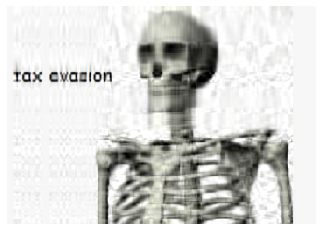

In [8]:
img_comp, pca, img_pca = compression(img, 16)
plt.axis(False)
plt.imshow(img_comp)
size_comparison(img, pca, img_pca)

Widać już i tekst i szkieleta a obrazek ma wielkość tylko 4% oryginału.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Size before compression: 
1236616
Size after compression: 
130830
Compression ratio: 
10.58%


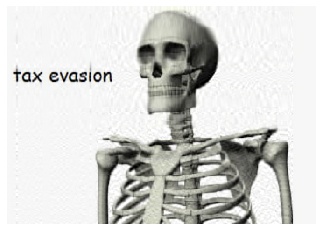

In [9]:
img_comp, pca, img_pca = compression(img, 42)
plt.axis(False)
plt.imshow(img_comp)
size_comparison(img, pca, img_pca)

Tutaj już 10% rozmiaru oryginału ale z przymrużeniem oka bardzo podobnie do oryginału.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Size before compression: 
1236616
Size after compression: 
311500
Compression ratio: 
25.19%


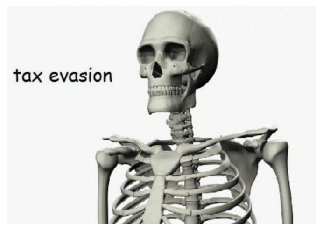

In [10]:
img_comp, pca, img_pca = compression(img, 100)
plt.axis(False)
plt.imshow(img_comp)
size_comparison(img, pca, img_pca)

Przy tej kompresji udało nam się zmniejszyć rozmiar obrazka o 3/4, a jak widać jest już nieodróżnialny od oryginału.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Size before compression: 
1236616
Size after compression: 
623000
Compression ratio: 
50.38%


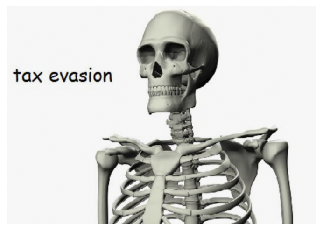

In [11]:
img_comp, pca, img_pca = compression(img, 200)
plt.axis(False)
plt.imshow(img_comp)
size_comparison(img, pca, img_pca)

Faktycznie w porównaniu z poprzednim wielkość obrazka zwiększyła się dwukrotnie a nie widać poprawy w jakości. Kompresja dla 100 komponentów wydaje się najlepszą opcją.